In [1]:
from google.colab import files
uploaded = files.upload()


Saving train_and_test2.csv to train_and_test2.csv


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
train_df = pd.read_csv('train_and_test2.csv')

In [5]:
print(train_df.head())
print(train_df.info())
print(train_df.describe())


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [6]:
#handle missing values
train_df.isnull().sum()
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [7]:
#create numerical values

In [8]:
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])


In [13]:
features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['2urvived']


In [14]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
 X_test

,Pclass,Sex,Age,Parch,Fare,Embarked
1148,3,0,28.0,0,8.0500,2
1049,1,0,42.0,0,26.5500,2
982,3,0,28.0,0,7.7750,2
808,2,0,39.0,0,13.0000,2
1195,3,1,28.0,0,7.7500,1
...,...,...,...,...,...,...
572,1,0,36.0,0,26.3875,2
140,3,1,28.0,2,15.2458,0
1182,3,1,30.0,0,6.9500,1
312,2,1,26.0,1,26.0000,2


In [16]:
#train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
#make prediction
y_pred = model.predict(X_test)


**Evaluate the model**


In [18]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.6946564885496184


In [19]:
print('Classification Report:')

Classification Report:


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       189
           1       0.45      0.45      0.45        73

    accuracy                           0.69       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.69      0.69      0.69       262



In [21]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[149  40]
 [ 40  33]]


In [23]:
test_df = pd.read_csv('train_and_test2.csv')

In [24]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Sex'] = le.transform(test_df['Sex'])
test_df['Embarked'] = le.transform(test_df['Embarked'])
X_test_df = test_df[features]


In [25]:
test_predictions = model.predict(X_test_df)


In [28]:
output = pd.DataFrame({'PassengerId': test_df.Passengerid, 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)


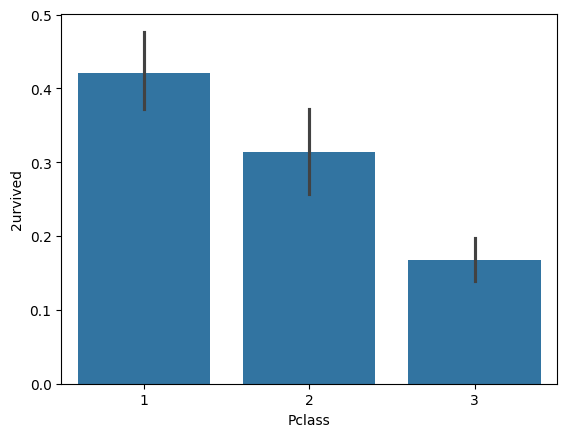

In [30]:
sns.barplot(x='Pclass', y='2urvived', data=train_df)
plt.show()
